importing Jupyter notebook from Milestone_1.ipynb


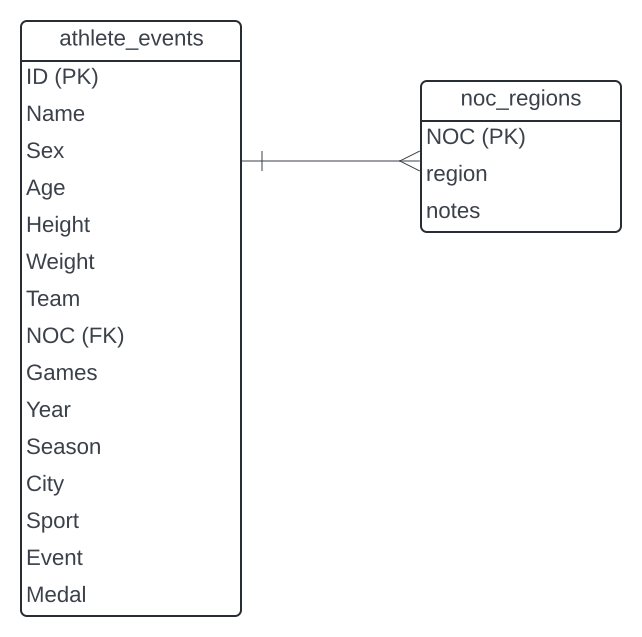

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import import_ipynb
from Milestone_1 import event_counts_df, average_stats_by_sport, gender_distribution, participants_by_country, athletes_per_year, medals_by_noc_type

# Descriptive Statistics
I would like to explore the athletes participation by sports, countries who have won more medals and how many athletes joined thru the years

# Grading Criteria Overview
1. Provide a summary of the different descriptive statistics you looked at and WHY

   The Dataset date range from 1896 to 2016. I used the sum, avg, min and max method for descriptive analysis. 

2. Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Dis you come up with additional ideas for other things  to review?

   The popular sports through the years are Athletics, Gymnastics, Swimming, Shooting and Cycling. Those who are rich countries tend to win more medals. And throughout the years the number of athletes that are joing the Olympics are flactuating due to number of reasons. Which I included on my data. Please see below.
  
3. Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

   Yes, It shows that rich countries tend to win more medals. I want to know thru the years the consistency of the rich countries.
  
4.  What additional questions are you seeking to answer?

     I wanna know if men still dominate the sports thru the years?

In [40]:
pysqldf('''SELECT sport,
                  athlete_count
                  FROM event_counts_df
                  GROUP BY sport
                  ORDER BY athlete_count DESC''')

,sport,athlete_count
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10827
...,...,...
61,Racquets,12
62,Jeu De Paume,11
63,Roque,4
64,Basque Pelota,2


In [199]:
pysqldf('''SELECT SUM(athlete_count) AS total_athlete_count, 
                  AVG(athlete_count) AS avg_athlete_count,
                  MIN(athlete_count) AS min_athlete_count, 
                  MAX(athlete_count) AS max_athlete_count
                  FROM event_counts_df
                  ''')

,total_athlete_count,avg_athlete_count,min_athlete_count,max_athlete_count
0,269731,4086.833333,1,38624


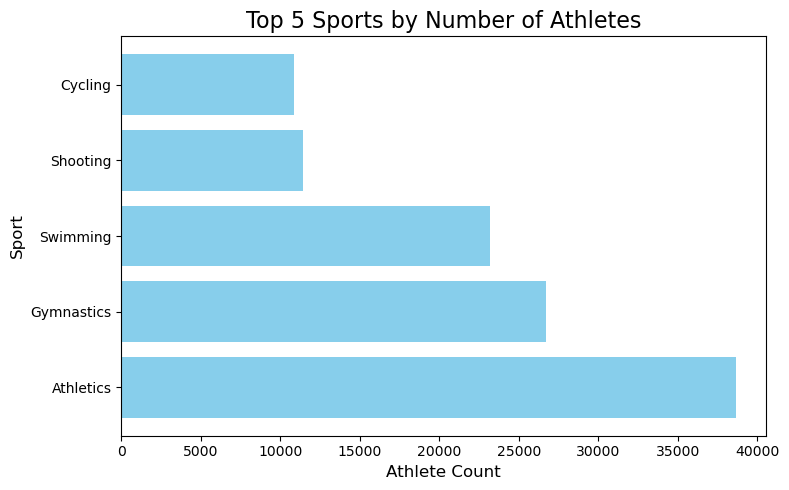

In [167]:
#top_sports = event_counts_df.head(10)
#top_sports = event_counts_df.sort_values(by='athlete_count', ascending=True)
top_sports = event_counts_df.sort_values(by='athlete_count', ascending=False).head(5)

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.barh(top_sports['sport'], top_sports['athlete_count'], color='skyblue')

# Adding title and labels
plt.title('Top 5 Sports by Number of Athletes', fontsize=16)
plt.xlabel('Athlete Count', fontsize=12)
plt.ylabel('Sport', fontsize=12)

# Displaying the chart
plt.tight_layout()
plt.show()



In [183]:
pysqldf('''SELECT sport,
                  athlete_count
                  FROM event_counts_df
                  WHERE athlete_count <= 50
                  GROUP BY sport
                  ORDER BY athlete_count''')

,sport,athlete_count
0,Aeronautics,1
1,Basque Pelota,2
2,Roque,4
3,Jeu De Paume,11
4,Racquets,12
5,Motorboating,17
6,Croquet,19
7,Cricket,24
8,Military Ski Patrol,24
9,Alpinism,25


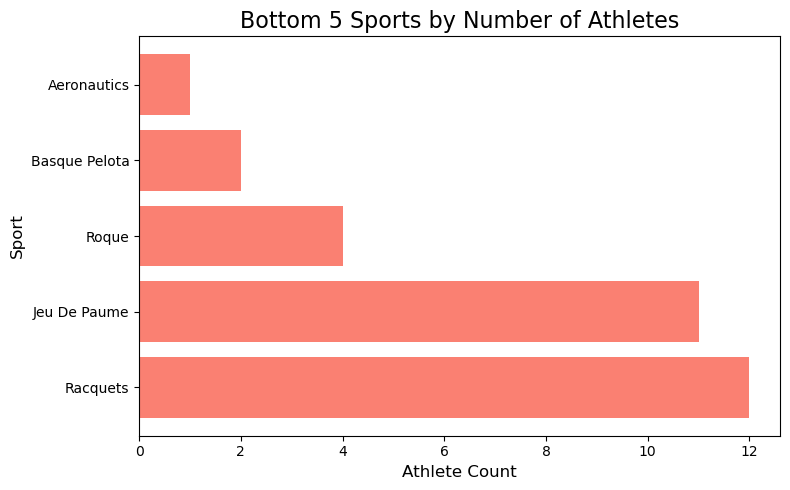

In [177]:
# Extracting the bottom 5 sports by athlete_count
bottom_sports = event_counts_df.tail(5)

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.barh(bottom_sports['sport'], bottom_sports['athlete_count'], color='salmon')

# Adding title and labels
plt.title('Bottom 5 Sports by Number of Athletes', fontsize=16)
plt.xlabel('Athlete Count', fontsize=12)
plt.ylabel('Sport', fontsize=12)

# Displaying the chart
plt.tight_layout()
plt.show()


Those popular sports tend to have more athletes compared to less popular sports. The possible reasons are global reach, funding and infrastructure, opportunities and exposure, and cultural influence. Less popular sports might have fewer athletes due to limited opportunities, less visibility and reduced acces to resources. 

In [6]:
pysqldf('''SELECT NOC,
                  SUM(Gold)   AS Gold,
                  SUM(Silver) AS Silver,
                  SUM(Bronze) AS Bronze,
                  SUM(Gold + Silver + Bronze) AS Total
            FROM medals_by_noc_type
            GROUP BY NOC
            ORDER BY Total DESC
            ''')

,NOC,Gold,Silver,Bronze,Total
0,USA,1358,2638,1641,5637
1,URS,689,1082,732,2503
2,GER,746,745,674,2165
3,GBR,651,677,739,2067
4,FRA,666,499,602,1767
...,...,...,...,...,...
144,CYP,0,0,1,1
145,BOT,0,0,1,1
146,BER,1,0,0,1
147,BAR,1,0,0,1


In [207]:
pysqldf('''SELECT SUM(Gold + Silver + Bronze) AS Total,
                  AVG(Gold + Silver + Bronze) AS Avg_Medals,
                  MAX(Gold + Silver + Bronze) AS Max_Medals,
                  MIN(Gold + Silver + Bronze) AS Min_Medals
            FROM medals_by_noc_type
            ORDER BY Total DESC
            ''')

,Total,Avg_Medals,Max_Medals,Min_Medals
0,39772,266.926174,5637,1


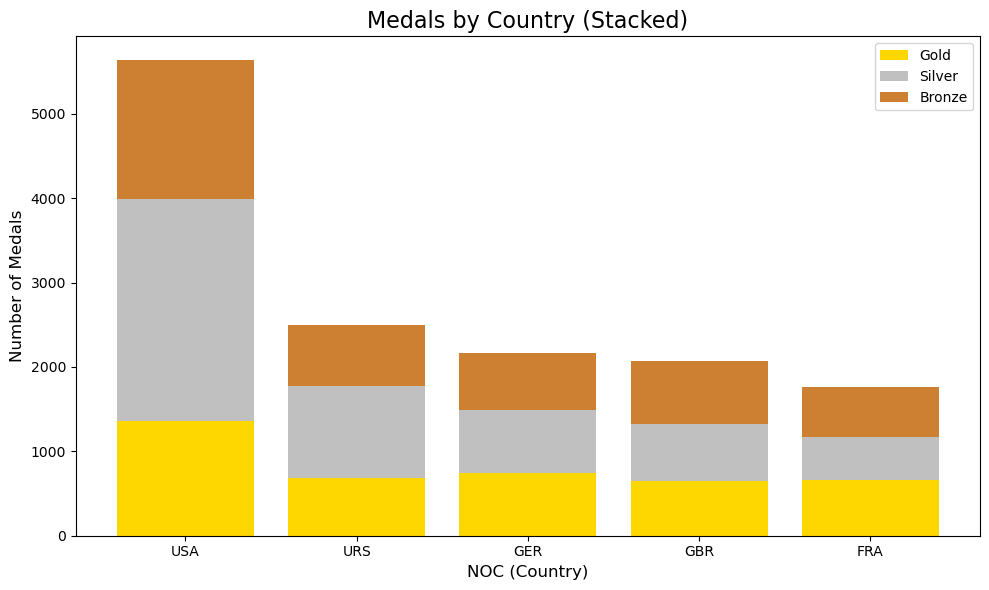

In [185]:
import numpy as np

# Data from the table
NOC = ['USA', 'URS', 'GER', 'GBR', 'FRA']
Gold = [1358, 689, 746, 651, 666]
Silver = [2638, 1082, 745, 677, 499]
Bronze = [1641, 732, 674, 739, 602]

# Convert the NOC list to a numpy array for positioning on the x-axis
ind = np.arange(len(NOC))

# Plotting the stacked bars
plt.figure(figsize=(10, 6))
plt.bar(ind, Gold, label='Gold', color='gold')
plt.bar(ind, Silver, bottom=Gold, label='Silver', color='silver')
plt.bar(ind, Bronze, bottom=np.array(Gold) + np.array(Silver), label='Bronze', color='#cd7f32')

# Adding labels and title
plt.xlabel('NOC (Country)', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.title('Medals by Country (Stacked)', fontsize=16)
plt.xticks(ind, NOC)  # Replace x-axis labels with NOC names

# Adding a legend to differentiate between Gold, Silver, and Bronze
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


Wealthier countries tend to win more Olympic medals compared to poorer countries. These are the factors contribute to the disparity: Funding and Resources, Sports Infrastracture, Talent identification Programs, Participation in Multiple Sports, Popular Size vs Wealth, Government Support and Prioritazation. But there is an exceptions like Traditions. Some less wealthy coutnries outperform their economic status because of deep-rooted sporting traditions. For example, like Kenya and Ethiopia consistently excel in long distance running events, despite being lower on the wealth scale. Targeted Invetment, like Jaimaica in sprinting or Cuba in boxing, focus resroucse on a few specific sports, enabling them to achieve success in those areas even with limited overall wealth.

In [50]:
pysqldf('''SELECT Year,
                  Number_of_Athletes
            FROM athletes_per_year
            ORDER BY Year
            ''')

,Year,Number_of_Athletes
0,1896,380
1,1900,1898
2,1904,1301
3,1906,1733
4,1908,3069
5,1912,4040
6,1920,4292
7,1924,5570
8,1928,5238
9,1932,2817


In [211]:
pysqldf('''SELECT SUM(Number_of_Athletes) AS total_number_of_athletes,
                  AVG(Number_of_Athletes) AS avg_number_of_athletes,
                  MAX(Number_of_Athletes) AS max_number_of_athletes,
                  MIN(Number_of_Athletes) AS min_number_of_athletes
            FROM athletes_per_year
            ''')

,total_number_of_athletes,avg_number_of_athletes,max_number_of_athletes,min_number_of_athletes
0,269731,7706.6,16413,380


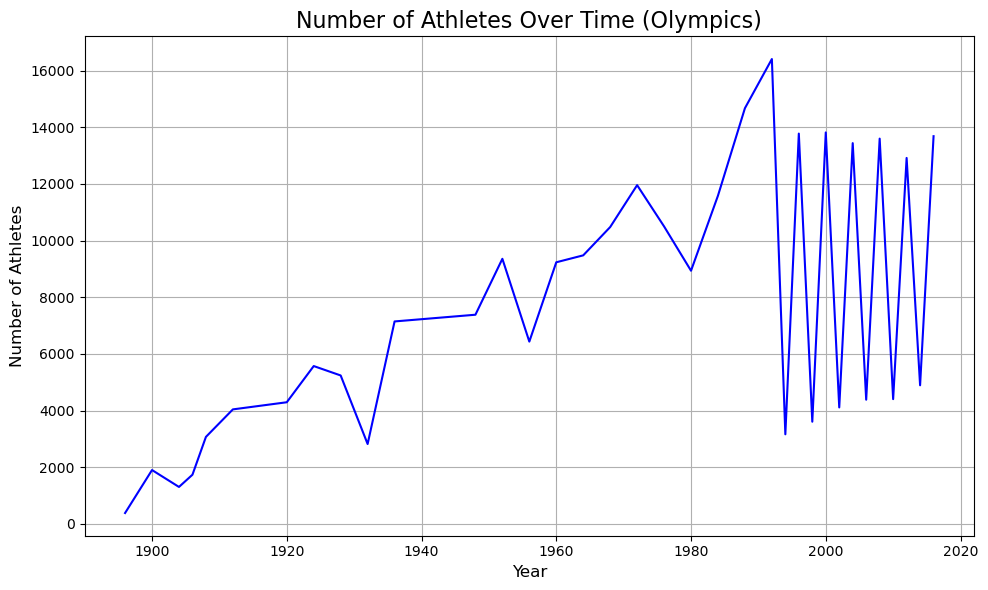

In [189]:
years = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 
         1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 
         1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]
number_of_athletes = [380, 1898, 1301, 1733, 3069, 4040, 4292, 5570, 5238, 2817, 
                      7146, 7383, 9358, 6434, 9235, 9480, 10479, 11959, 10502, 
                      8937, 11588, 14676, 16413, 3160, 13780, 3605, 13821, 4109, 
                      13443, 4382, 13602, 4402, 12920, 4891, 13688]

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, number_of_athletes, linestyle='-', color='b')

# Adding title and labels
plt.title('Number of Athletes Over Time (Olympics)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Displaying the chart
plt.tight_layout()
plt.show()


The number of athletes in the Olympics has varied significantly over the years due to several factors:
1. World Events (Wars, Boycotts):

- The World Wars disrupted the Olympics, leading to cancellations in 1916, 1940, and 1944, and fewer athletes in subsequent games as nations recovered.
Political boycotts, like the U.S.-led boycott of the 1980 Moscow Olympics and the Soviet-led boycott of the 1984 Los Angeles Olympics, reduced athlete participation.

2. Summer vs. Winter Olympics:

- From 1994 onward, the Summer and Winter Olympics were held in alternating even-numbered years. Winter Olympics typically have fewer athletes compared to the Summer Games, which explains the dip in numbers for years like 1994, 1998, 2002, etc.
Geopolitical and Economic Factors:

- The host country's ability to accommodate athletes and the resources they allocate can influence participation. For example, economic downturns or political instability in certain regions could lead to fewer athletes being sent.

3. Evolution of the Olympic Program:

- The number of sports and events has grown, but the inclusion or exclusion of specific sports also impacts the number of athletes. For instance, some sports have been removed or added in different years.

4. Qualification Systems:

- Over the years, the Olympic qualification systems have evolved, becoming more rigorous in some sports, which may limit the number of athletes from each country.

These factors together explain why the trend in athlete participation is not always upward or consistent.